# Implementing Discriminant Analysis
Following on from our theoretical introduction to discriminant analysis, we now implement the discriminant classification methods as we previously described.

## Importing Libraries
We need NumPy, Pandas, Seaborn, Matplotlib and various functions from different sub-libraries of the scikit-learn library.

Discriminant analysis can only handle numeric inputs, so we must one-hot encode the categorical features in our dataset, using OneHotEncoder from scikit-learn.

Also, since LDA, QDA and RDA assumes that features are normally distributed within each class, we standardise the data using StandardScaler from scikit-learn.

We also import the metric functions accuracy_score, confusion_matrix and classification_report which contains all of the relevant metrics (precision, recall, f1-score, support, accuracy) from scikit-learn so that we can evaluate the performance of our classification models. Although classifiiction_score contains the accuracy, we import the accuracy_score function for convenience.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Training and Test Data

In [2]:
# Load the saved datasets from the CSV files
X_train = pd.read_csv("../data/X_train.csv", index_col=0)  # Use the first column as index
y_train = pd.read_csv("../data/y_train.csv", index_col=0)  # Use the first column as index
X_test = pd.read_csv("../data/X_test.csv", index_col=0)    # Use the first column as index
y_test = pd.read_csv("../data/y_test.csv", index_col=0)    # Use the first column as index

# Display the first few rows of the loaded datasets
(X_train.head(), y_train.head(), X_test.head(), y_test.head())

(   age         workclass  fnlwgt  education  education-num  \
 0   39         State-gov   77516  Bachelors             13   
 1   50  Self-emp-not-inc   83311  Bachelors             13   
 2   38           Private  215646    HS-grad              9   
 3   53           Private  234721       11th              7   
 4   28           Private  338409  Bachelors             13   
 
        marital-status         occupation   relationship   race     sex  \
 0       Never-married       Adm-clerical  Not-in-family  White    Male   
 1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
 2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
 3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
 4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
 
    capital-gain  capital-loss  hours-per-week native-country  
 0          2174             0              40  United-States  
 1             0             0          

## Pre-processing Data
Now, we one-hot encode the categorical columns so that all of the columns are numeric for our models. Next, we convert our data to a dataframe since this is easier to work with. We finish by standardising the data and ensuring the data is in the correct form for our modelling.

In [3]:
# Separate the numeric and categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# One-hot encode the categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert the encoded categorical variables into DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the numeric columns back with the one-hot encoded categorical columns
X_train_full = pd.concat([X_train[numeric_columns].reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_full = pd.concat([X_test[numeric_columns].reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Ensure the target variables are flattened arrays
y_train_array = y_train['income'].values.ravel()
y_test_array = y_test['income'].values.ravel()

## Linear Discriminant Analysis
We now implement LDA, by fitting the model, then testing our model on the test data. We evaluate the performance of our model using accuracy, the confusion matrix, precision, recall and F1-score.

In [55]:
# Fit the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train_array)

# Predict on the test set
y_pred_lda = lda.predict(X_test_scaled)

# Evaluate the model's performance
lda_accuracy = accuracy_score(y_test_array, y_pred_lda)
lda_conf_matrix = confusion_matrix(y_test_array, y_pred_lda)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(lda_conf_matrix)

# Generate the classification report
lda_report = classification_report(y_test_array, y_pred_lda, target_names=['<=50K', '>50K'], output_dict=True)

# Print the classification report
print(lda_report)

Accuracy: 0.84
Confusion Matrix:
[[6357  505]
 [ 947 1259]]
{'<=50K': {'precision': 0.8703450164293538, 'recall': 0.9264062955406587, 'f1-score': 0.8975010588733587, 'support': 6862.0}, '>50K': {'precision': 0.713718820861678, 'recall': 0.570716228467815, 'f1-score': 0.6342569269521411, 'support': 2206.0}, 'accuracy': 0.8398764887516542, 'macro avg': {'precision': 0.7920319186455159, 'recall': 0.7485612620042368, 'f1-score': 0.7658789929127499, 'support': 9068.0}, 'weighted avg': {'precision': 0.8322420844242487, 'recall': 0.8398764887516542, 'f1-score': 0.833460856511404, 'support': 9068.0}}


EXPLAIN RESULTS...

## Quadratic Discriminant Analysis
We now implement QDA, by fitting the model, then testing our model on the test data. We evaluate the performance of our model using accuracy, the confusion matrix, precision, recall and F1-score.

In [56]:
# Fit the Quadratic Discriminant Analysis (QDA) model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train_array)

# Predict on the test set
y_pred_qda = qda.predict(X_test_scaled)

# Evaluate the model's performance
qda_accuracy = accuracy_score(y_test_array, y_pred_qda)
qda_conf_matrix = confusion_matrix(y_test_array, y_pred_qda)

# Print the evaluation results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(qda_conf_matrix)

# Generate the classification report
qda_report = classification_report(y_test_array, y_pred_qda, target_names=['<=50K', '>50K'], output_dict=True)

# Print the classification report
print(qda_report)

C:\Users\milse\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.84
Confusion Matrix:
[[1651 5211]
 [ 134 2072]]
{'<=50K': {'precision': 0.9249299719887956, 'recall': 0.24060040804430197, 'f1-score': 0.38186654330981845, 'support': 6862.0}, '>50K': {'precision': 0.2844981463682548, 'recall': 0.9392565729827742, 'f1-score': 0.436716197702603, 'support': 2206.0}, 'accuracy': 0.41056462284958095, 'macro avg': {'precision': 0.6047140591785252, 'recall': 0.5899284905135381, 'f1-score': 0.4092913705062107, 'support': 9068.0}, 'weighted avg': {'precision': 0.7691301696819018, 'recall': 0.41056462284958095, 'f1-score': 0.39520998592014955, 'support': 9068.0}}


EXPLAIN RESULTS......
EXPLAIN WARNING......

## Regularised Discriminant Analysis
We now implement QDA, by fitting the model, then testing our model on the test data. We evaluate the performance of our model using accuracy, the confusion matrix, precision, recall and F1-score.
We do so by creating our own RegularisedDiscriminantAnalysis class since there is no regularised discriminant analysis class in scikit-learn.

## Visualisations
We will create visualisations to compare our performance metrics from our LDA, QDA and RDA models.

SORT OUT CLASSIFICATION REPORT / METRICS

RENAME METRICS FOR EACH LDA, QDA, RDA

COMPARE EACH SIDE BY SIDE

PLOT ROC CURVE

In [57]:
# Print accuracies
print(f"LDA Accuracy: {lda_accuracy:.2f}")
print(f"QDA Accuracy: {qda_accuracy:.2f}")
#print(f"RDA Accuracy: {rda_accuracy:.2f}")

LDA Accuracy: 0.84
QDA Accuracy: 0.41


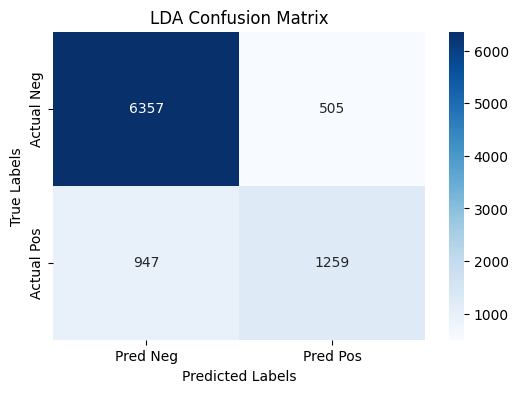

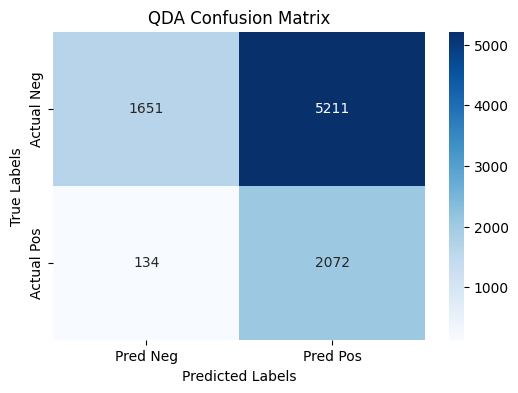

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Pred Neg', 'Pred Pos'], 
                yticklabels=['Actual Neg', 'Actual Pos'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(lda_conf_matrix, 'LDA Confusion Matrix')
plot_confusion_matrix(qda_conf_matrix, 'QDA Confusion Matrix')
#plot_confusion_matrix(cm_rda, 'RDA Confusion Matrix')

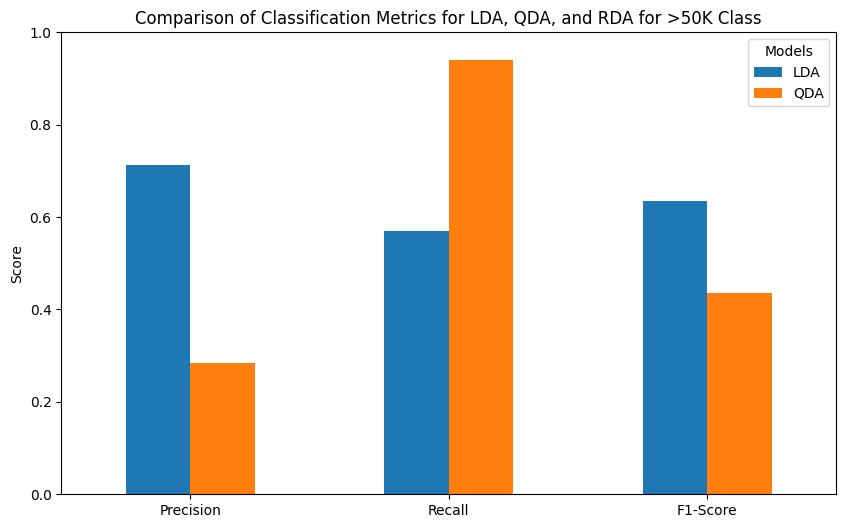

In [67]:
# Create a DataFrame from the classification reports
comparison_df = pd.DataFrame({
    'LDA': [lda_report['>50K']['precision'], lda_report['>50K']['recall'], lda_report['>50K']['f1-score']],
    'QDA': [qda_report['>50K']['precision'], qda_report['>50K']['recall'], qda_report['>50K']['f1-score']],
    
}, index=['Precision', 'Recall', 'F1-Score'])

###ADD IN LATER:
### 'RDA': [rda_report['>50K']['precision'], rda_report['>50K']['recall'], rda_report['>50K']['f1-score']]

# Plotting
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Metrics for LDA, QDA, and RDA for >50K Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()

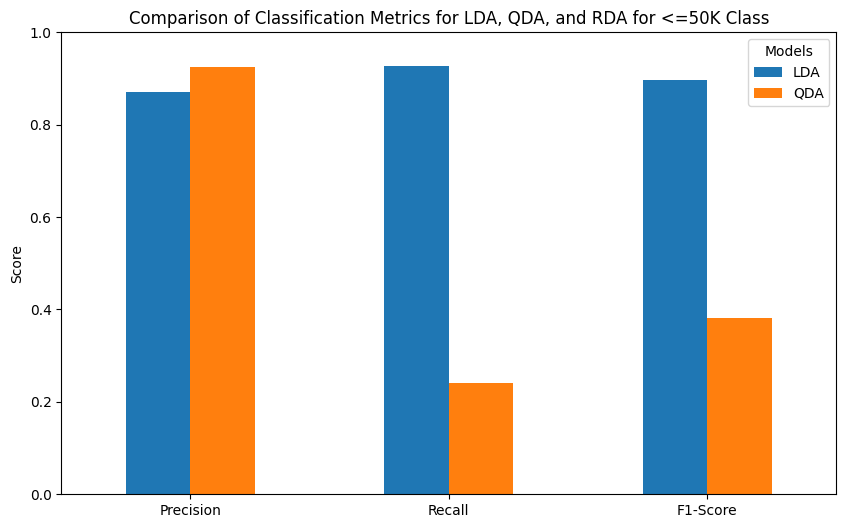

In [68]:
# Create a DataFrame from the classification reports
comparison_df = pd.DataFrame({
    'LDA': [lda_report['<=50K']['precision'], lda_report['<=50K']['recall'], lda_report['<=50K']['f1-score']],
    'QDA': [qda_report['<=50K']['precision'], qda_report['<=50K']['recall'], qda_report['<=50K']['f1-score']],
    
}, index=['Precision', 'Recall', 'F1-Score'])

###ADD IN LATER:
### 'RDA': [rda_report['<=50K']['precision'], rda_report['<=50K']['recall'], rda_report['<=50K']['f1-score']]

# Plotting
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Metrics for LDA, QDA, and RDA for <=50K Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()

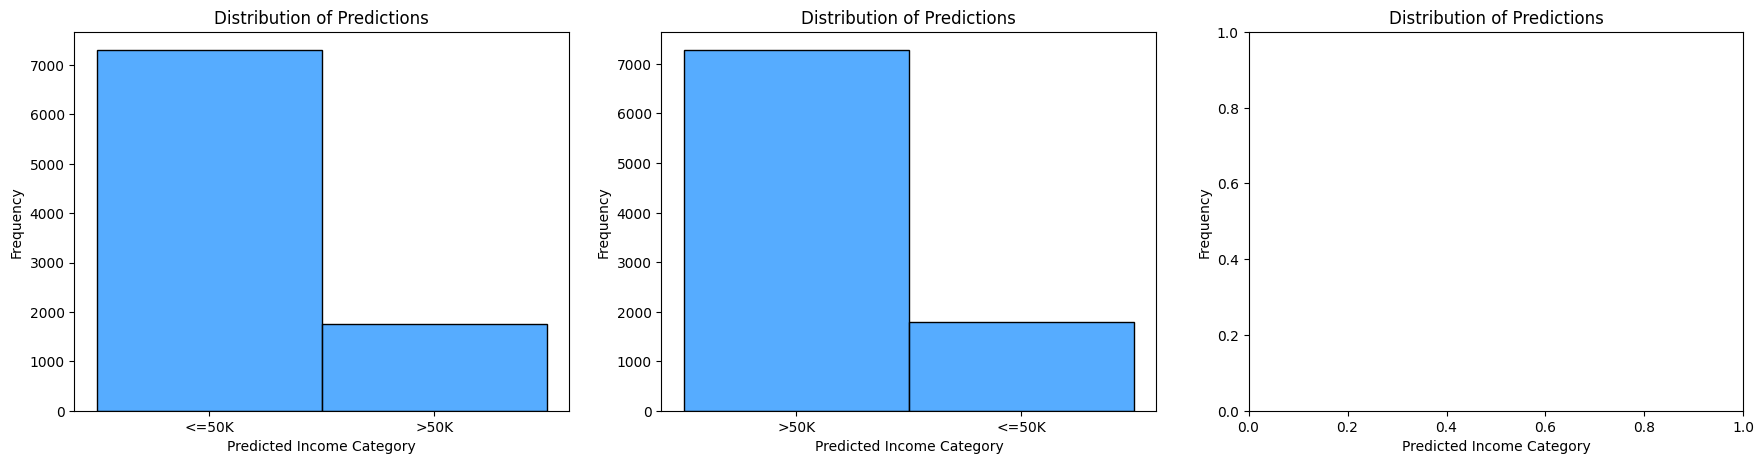

In [75]:
plt.figure(figsize=(18, 5))  # Adjusting figure size to make the plots smaller and fit in one row
plt.subplot(1, 3, 1)

# Distribution of Predictions for LDA
plt.subplot(1, 3, 1)
sns.histplot(y_pred_lda, kde=False, color='dodgerblue', bins=4)
plt.title("Distribution of Predictions", fontsize=12, color='black')
plt.xlabel("Predicted Income Category", fontsize=10, color='black')
plt.ylabel("Frequency", fontsize=10, color='black')

# Distribution of Predictions for QDA
plt.subplot(1, 3, 2)
sns.histplot(y_pred_qda, kde=False, color='dodgerblue', bins=4)
plt.title("Distribution of Predictions", fontsize=12, color='black')
plt.xlabel("Predicted Income Category", fontsize=10, color='black')
plt.ylabel("Frequency", fontsize=10, color='black')

# Distribution of Predictions for RDA
plt.subplot(1, 3, 3)
#sns.histplot(y_pred_rda, kde=False, color='dodgerblue', bins=4)
plt.title("Distribution of Predictions", fontsize=12, color='black')
plt.xlabel("Predicted Income Category", fontsize=10, color='black')
plt.ylabel("Frequency", fontsize=10, color='black')

# Adjust layout to ensure proper spacing
plt.tight_layout(pad=2)
plt.show()


## Conclusion
BEST MODEL IS... SINCE ...
PROBLEMS?
HOW CAN WE IMPROVE? --> CROSS VALIDATION IN NEXT NOTEBOOK

## References
[1] Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: springer, 2009.

[2] Research Method Article: https://researchmethod.net/discriminant-analysis/

[3] scikit-learn Documentation - 1.2 Linear and Quadratic Discriminant Analysis: https://scikit-learn.org/stable/modules/lda_qda.html

[4] scikit-learn Documenation - 6.3 Preprocessing data: https://scikit-learn.org/stable/modules/preprocessing.html

[5] sckit-learn Documentation - 3.4 Metrics and scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#

[5] Sebastian Raschka’s PCA vs LDA article with Python Examples: https://sebastianraschka.com/Articles/2014_python_lda.html#lda-via-scikit-learn

[6] Data Science Toolbox Lecture Notes on ROC Curves: https://dsbristol.github.io/dst/assets/slides/05.1-Classification.pdf

------
make a new notebook (MAKING IT BETTER)

LDA WITH CV

QDA WITH CV

RDA WITH CV

PCA?

REMOVE HIGHLY CORRELATED FEATURES?

VISUALISATIONS OF METRICS AND DISCUSS

PLOT ROC CURVES OF ALL 6

CONCLUSION

MISSING DATA TECHNIQUES???

SMOTE???

## LDA with k-fold Cross-validation

Cross-Validation Accuracy: 0.841655352742998


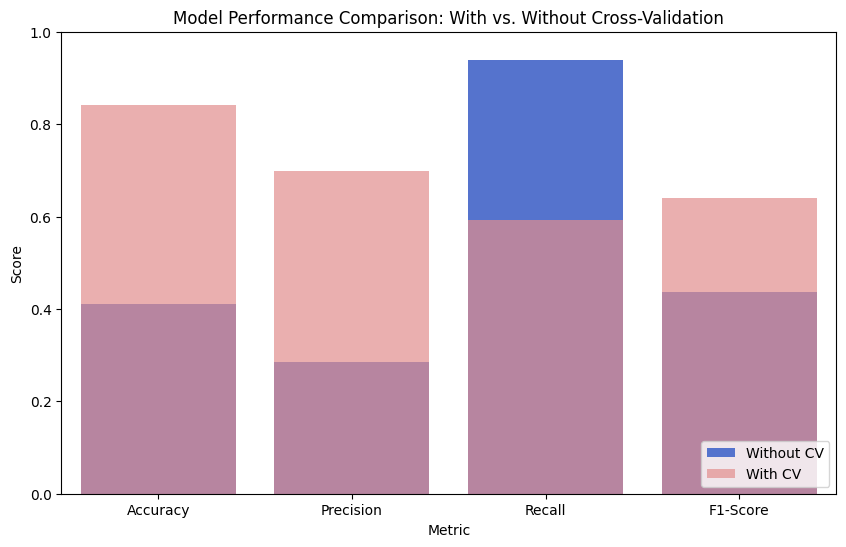

Classification Report with Cross-Validation:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     30293
        >50K       0.70      0.59      0.64      9481

    accuracy                           0.84     39774
   macro avg       0.79      0.76      0.77     39774
weighted avg       0.84      0.84      0.84     39774



In [7]:
from sklearn.model_selection import cross_val_predict

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Step 1: Perform cross-validation and obtain predictions for each fold
y_pred_cv = cross_val_predict(lda, X_train_scaled, y_train.values.ravel(), cv=5)

# Step 2: Calculate accuracy scores
cv_accuracy = np.mean(y_pred_cv == y_train.values.ravel())
print(f"Cross-Validation Accuracy: {cv_accuracy}")

# Step 3: Generate classification report
cv_class_report = classification_report(y_train, y_pred_cv, output_dict=True)
cv_class_report_df = pd.DataFrame(cv_class_report).transpose()

# Step 4: Prepare for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Without CV': [
        accuracy,
        class_report_df.loc['>50K', 'precision'],
        class_report_df.loc['>50K', 'recall'],
        class_report_df.loc['>50K', 'f1-score']
    ],
    'With CV': [
        cv_accuracy,
        cv_class_report_df.loc['>50K', 'precision'],
        cv_class_report_df.loc['>50K', 'recall'],
        cv_class_report_df.loc['>50K', 'f1-score']
    ]
})

# Step 5: Plotting Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Without CV', data=metrics_df, color='royalblue', label='Without CV')
sns.barplot(x='Metric', y='With CV', data=metrics_df, color='lightcoral', label='With CV', alpha=0.7)

plt.title("Model Performance Comparison: With vs. Without Cross-Validation")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

# Step 6: Display classification reports for reference
# Ensure to use y_pred_cv (from cross-validation) instead of y_pred
print("Classification Report with Cross-Validation:")
print(classification_report(y_train.values.ravel(), y_pred_cv))

## ROC Curve

In [8]:
# Ensure y_train is a 1D array by converting it to a NumPy array
y_train_array = y_train.values.ravel()

# Step 1: Fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train_array)

# Step 2: Get predicted probabilities for the positive class (>50K)
y_pred_prob = lda.predict_proba(X_train_scaled)[:, 1]  # Get probabilities for the >50K class

# Step 3: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_array, y_pred_prob, pos_label='>50K')
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

# Step 4: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


NameError: name 'roc_curve' is not defined